In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
df = pd.read_csv('/content/SAMSUNG.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
# 8. Define RNN Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 3s 64ms/step - loss: 0.0470 - val_loss: 0.0043
Epoch 2/100
20/20 [==============================] - 0s 21ms/step - loss: 0.0084 - val_loss: 0.0041
Epoch 3/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0057 - val_loss: 0.0033
Epoch 4/100
20/20 [==============================] - 1s 34ms/step - loss: 0.0050 - val_loss: 0.0031
Epoch 5/100
20/20 [==============================] - 1s 31ms/step - loss: 0.0047 - val_loss: 0.0031
Epoch 6/100
20/20 [==============================] - 1s 30ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 7/100
20/20 [==============================] - 1s 29ms/step - loss: 0.0043 - val_loss: 0.0029
Epoch 8/100
20/20 [==============================] - 1s 29ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 9/100
20/20 [==============================] - 1s 33ms/step - loss: 0.0043 - val_loss: 0.0032
Epoch 10/100
20/20 [==============================] - 1s 35ms/step - loss: 0.0041 - val_loss: 0.0034

In [10]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 7ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [12]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 69011.80690471787


Dự Đoán 30 ngày tiếp theo

In [13]:
x_input = test_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):

    if(len(temp_input) > 100):
        # Chỉ lấy 100 phần tử cuối cùng
        x_input = np.array(temp_input[-100:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        # Dự đoán
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1


0 day input [0.63654618 0.46972804 0.63654618 0.63453815 0.63654618 0.64257028
 0.64658635 0.46972804 0.46972804 0.64658635 0.67670683 0.65261044
 0.63654618 0.62248996 0.64457831 0.46972804 0.64457831 0.62650602
 0.64457831 0.66064257 0.66465863 0.62449799 0.46972804 0.62449799
 0.63453815 0.63453815 0.71686747 0.76506024 0.75702811 0.46972804
 0.46972804 0.74297189 0.77710843 0.7751004  0.79518072 0.82730924
 0.46972804 0.46972804 0.81927711 0.87951807 0.86144578 0.88554217
 0.86947791 0.46972804 0.46972804 0.86947791 0.85140562 0.46972804
 0.86144578 0.85341365 0.46972804 0.46972804 0.82329317 0.77911647
 0.75702811 0.77108434 0.73092369 0.46972804 0.46972804 0.70080321
 0.68875502 0.75100402 0.70481928 0.71285141 0.46972804 0.46972804
 0.71285141 0.72891566 0.46972804 0.73895582 0.73092369 0.46972804
 0.46972804 0.46972804 0.80522088 0.80522088 0.77309237 0.76305221
 0.46972804 0.46972804 0.74698795 0.74497992 0.46972804 0.74297189
 0.72690763 0.46972804 0.46972804 0.75702811 0.746

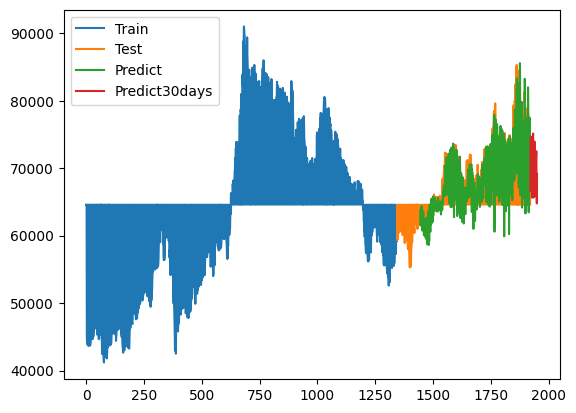

In [14]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size + n_steps, stop=train_size + n_steps + len(y_pred), step=1)
plt.plot(test_data_index_pred, y_pred)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1) + len(lst_output), step=1)
plt.plot(prediect_data_index, scaler.inverse_transform(lst_output))

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()


Dự đoán 60 ngày tiếp theo

In [15]:
x_input = test_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_60 = []
n_steps = 100
i = 0
while(i < 60):

    if(len(temp_input) > 100):
        # Chỉ lấy 100 phần tử cuối cùng
        x_input = np.array(temp_input[-100:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        # Dự đoán
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output_60.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i = i + 1


0 day input [0.63654618 0.46972804 0.63654618 0.63453815 0.63654618 0.64257028
 0.64658635 0.46972804 0.46972804 0.64658635 0.67670683 0.65261044
 0.63654618 0.62248996 0.64457831 0.46972804 0.64457831 0.62650602
 0.64457831 0.66064257 0.66465863 0.62449799 0.46972804 0.62449799
 0.63453815 0.63453815 0.71686747 0.76506024 0.75702811 0.46972804
 0.46972804 0.74297189 0.77710843 0.7751004  0.79518072 0.82730924
 0.46972804 0.46972804 0.81927711 0.87951807 0.86144578 0.88554217
 0.86947791 0.46972804 0.46972804 0.86947791 0.85140562 0.46972804
 0.86144578 0.85341365 0.46972804 0.46972804 0.82329317 0.77911647
 0.75702811 0.77108434 0.73092369 0.46972804 0.46972804 0.70080321
 0.68875502 0.75100402 0.70481928 0.71285141 0.46972804 0.46972804
 0.71285141 0.72891566 0.46972804 0.73895582 0.73092369 0.46972804
 0.46972804 0.46972804 0.80522088 0.80522088 0.77309237 0.76305221
 0.46972804 0.46972804 0.74698795 0.74497992 0.46972804 0.74297189
 0.72690763 0.46972804 0.46972804 0.75702811 0.746

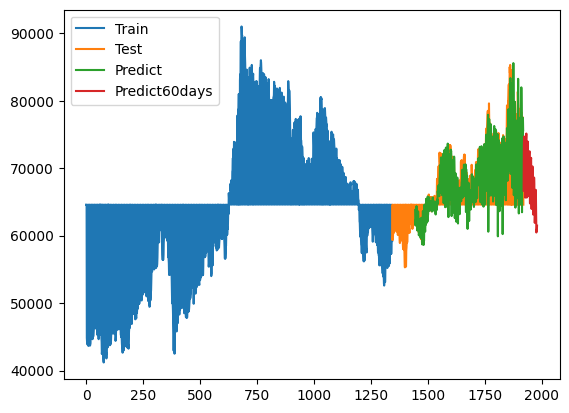

In [16]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size + n_steps, stop=train_size + n_steps + len(y_pred), step=1)
plt.plot(test_data_index_pred, y_pred)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1) + len(lst_output_60), step=1)
plt.plot(prediect_data_index, scaler.inverse_transform(lst_output_60))

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])
plt.show()

Dự đoán 90 ngày tiếp theo

In [17]:
x_input = test_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 100):
        # Chỉ lấy 100 phần tử cuối cùng
        x_input = np.array(temp_input[-100:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        # Dự đoán
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1


0 day input [0.63654618 0.46972804 0.63654618 0.63453815 0.63654618 0.64257028
 0.64658635 0.46972804 0.46972804 0.64658635 0.67670683 0.65261044
 0.63654618 0.62248996 0.64457831 0.46972804 0.64457831 0.62650602
 0.64457831 0.66064257 0.66465863 0.62449799 0.46972804 0.62449799
 0.63453815 0.63453815 0.71686747 0.76506024 0.75702811 0.46972804
 0.46972804 0.74297189 0.77710843 0.7751004  0.79518072 0.82730924
 0.46972804 0.46972804 0.81927711 0.87951807 0.86144578 0.88554217
 0.86947791 0.46972804 0.46972804 0.86947791 0.85140562 0.46972804
 0.86144578 0.85341365 0.46972804 0.46972804 0.82329317 0.77911647
 0.75702811 0.77108434 0.73092369 0.46972804 0.46972804 0.70080321
 0.68875502 0.75100402 0.70481928 0.71285141 0.46972804 0.46972804
 0.71285141 0.72891566 0.46972804 0.73895582 0.73092369 0.46972804
 0.46972804 0.46972804 0.80522088 0.80522088 0.77309237 0.76305221
 0.46972804 0.46972804 0.74698795 0.74497992 0.46972804 0.74297189
 0.72690763 0.46972804 0.46972804 0.75702811 0.746

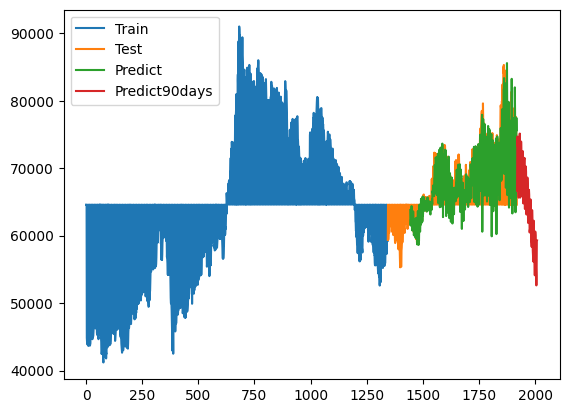

In [18]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size + n_steps, stop=train_size + n_steps + len(y_pred), step=1)
plt.plot(test_data_index_pred, y_pred)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1) + len(lst_output_90), step=1)
plt.plot(prediect_data_index, scaler.inverse_transform(lst_output_90))

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])
plt.show()